# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data: load the wine dataset from sklearn, and assign the feature names to a variable called X.

In [2]:
# your code here:

from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])

## Challenge 1: K-Means

#### 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [3]:
# your code here:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

X = StandardScaler().fit_transform(X)
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)

print('Silhouette Score for 8 clusters:', (silhouette_score(X, kmeans.predict(X))))

Silhouette Score for 8 clusters: 0.16234719165461203


#### 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [4]:
# your code here:

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

print('Silhouette Score for 5 clusters:', (silhouette_score(X, kmeans.predict(X))))

Silhouette Score for 5 clusters: 0.2011400251987226


#### 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [5]:
# your code here:

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

print('Silhouette Score for 3 clusters:', (silhouette_score(X, kmeans.predict(X))))

Silhouette Score for 3 clusters: 0.2848589191898987


#### 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

Please do two visualizations: one with inertia, and one with the silhouette score.

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

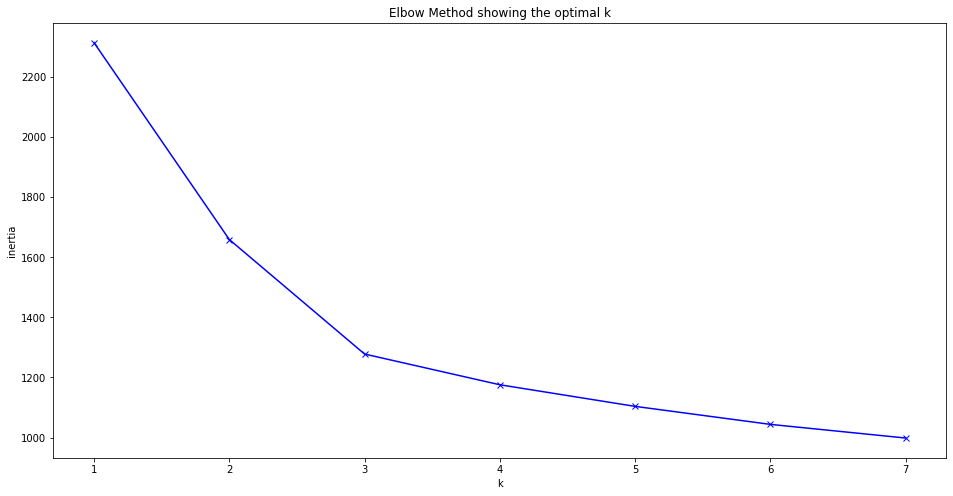

In [6]:
# your code here:

K = range(1, 8)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=7)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

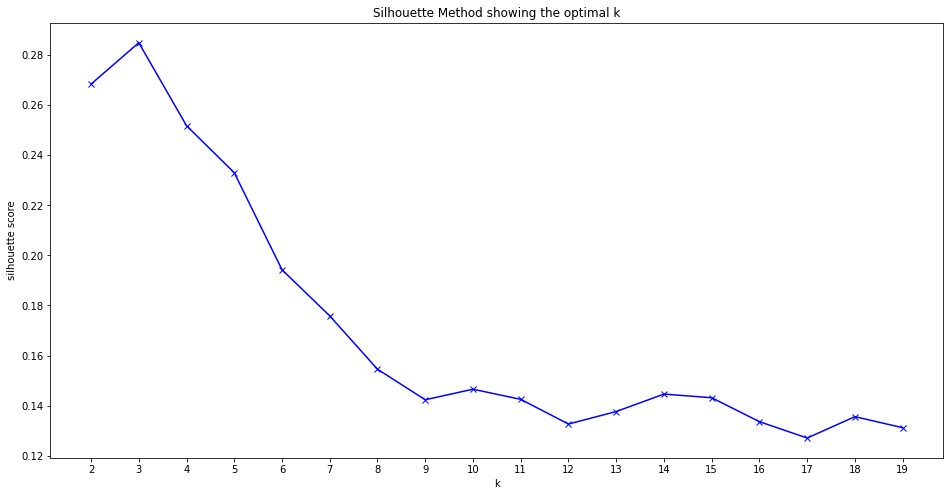

In [7]:
from sklearn.metrics import silhouette_score

K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=7)
    kmeans.fit(X)
    silhouette.append(silhouette_score(X, kmeans.predict(X)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

## Challenge 2: Aggromerative Clustering

#### 1. Please fit an AgglomerativeClustering model and compare the results you get to the KMeans results. Plot an elbow curve using the silhouette score.

In [10]:
from sklearn.cluster import AgglomerativeClustering

Text(0.5, 1.0, 'Silhouette Score for Agglomerative Clustering')

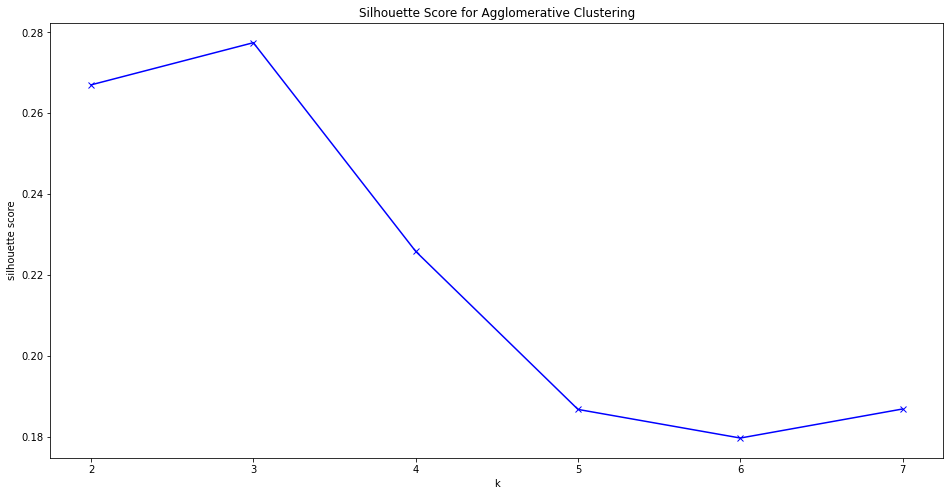

In [11]:
K = range(2, 8)
silhouette_hc = []

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit(X)
    silhouette_hc.append(silhouette_score(X, model.fit_predict(X)))

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, silhouette_hc, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Score for Agglomerative Clustering')

#### 2. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

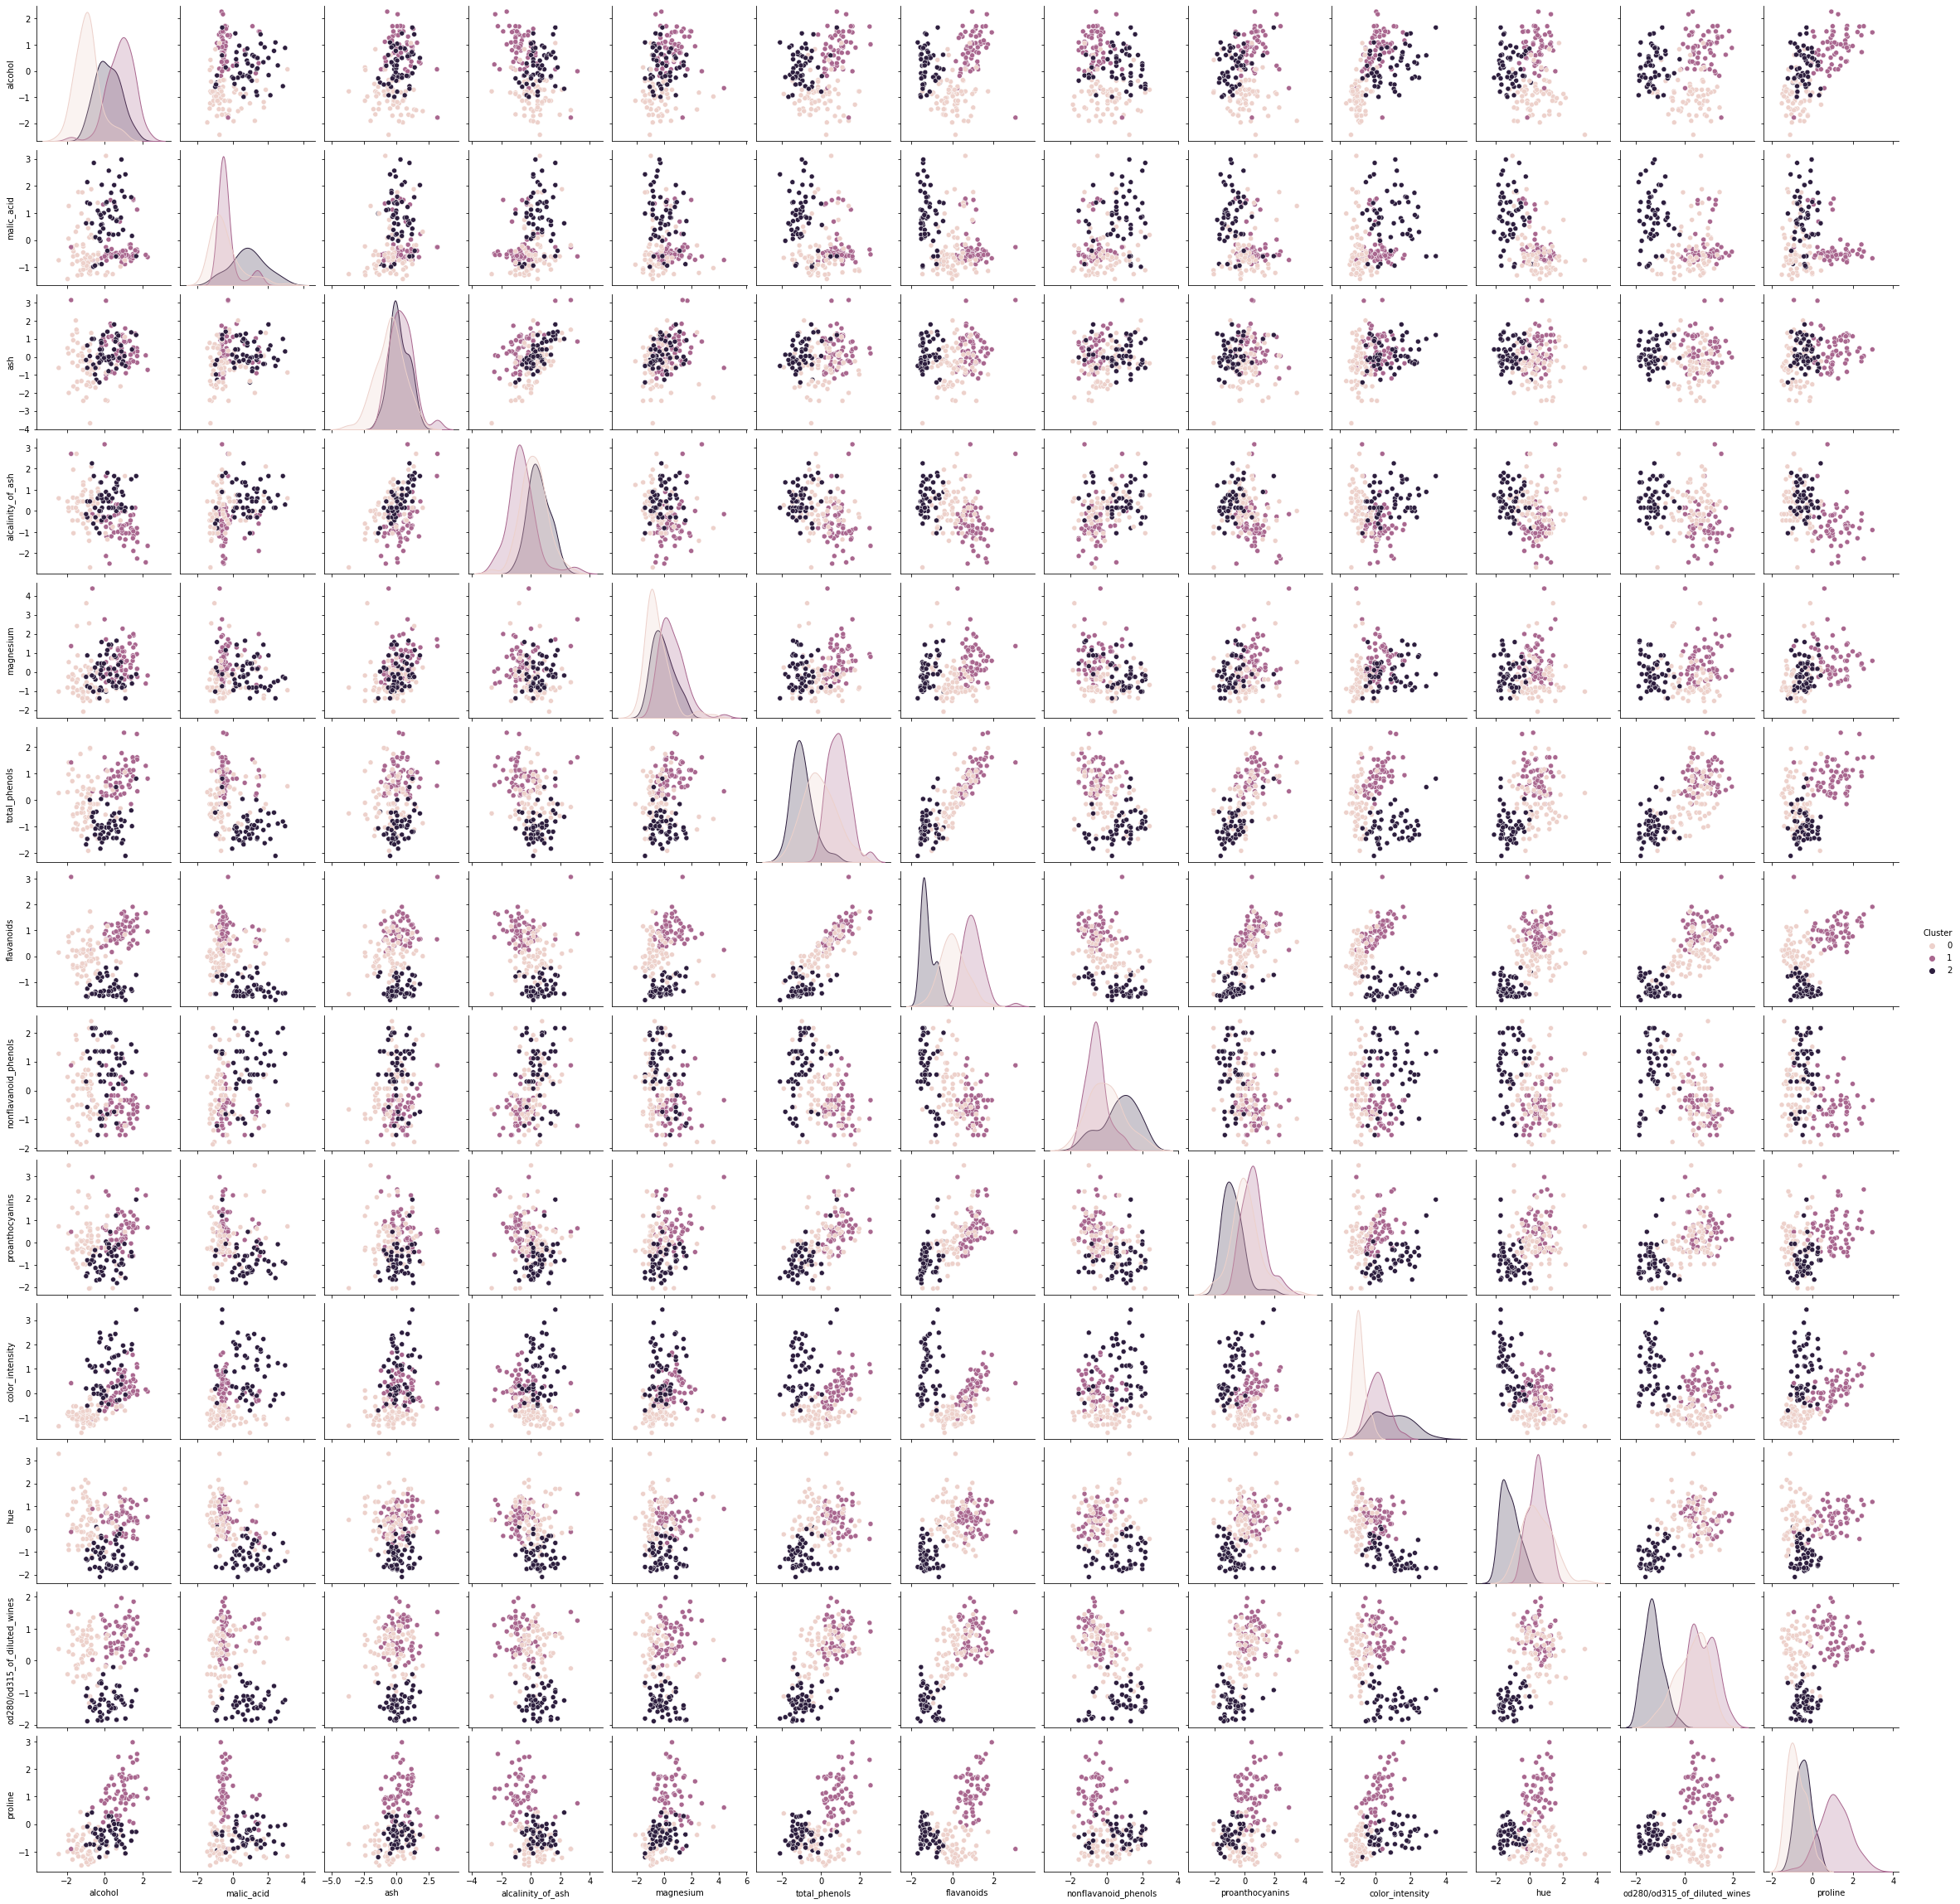

In [12]:
import seaborn as sns

df_data = pd.DataFrame(X, columns=data['feature_names'])

model = KMeans(n_clusters=3)
model.fit(X)
df_data['Cluster'] = model.predict(X)
sns.pairplot(df_data, hue='Cluster', vars=df_data.columns[:-1])

## Bonus Challenge: 
#### Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

Sources:

- https://www.machinelearningplus.com/machine-learning/principal-components-analysis-pca-better-explained/
- https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
(I particulary like this one :D see below part of it)

Imagine a big family dinner, where everybody starts asking you about PCA. First you explain it to your great-grandmother; then to you grandmother; then to your mother; then to your spouse; finally, to your daughter (who is a mathematician). Each time the next person is less of a layman. Here is how the conversation might go.

Great-grandmother: I heard you are studying "Pee-See-Ay". I wonder what that is...

You: Ah, it's just a method of summarizing some data. Look, we have some wine bottles standing here on the table. We can describe each wine by its colour, by how strong it is, by how old it is, and so on (see this very nice visualization of wine properties taken from here). We can compose a whole list of different characteristics of each wine in our cellar. But many of them will measure related properties and so will be redundant. If so, we should be able to summarize each wine with fewer characteristics! This is what PCA does.

Grandmother: This is interesting! So this PCA thing checks what characteristics are redundant and discards them?

You: Excellent question, granny! No, PCA is not selecting some characteristics and discarding the others. Instead, it constructs some new characteristics that turn out to summarize our list of wines well. 

(...)

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


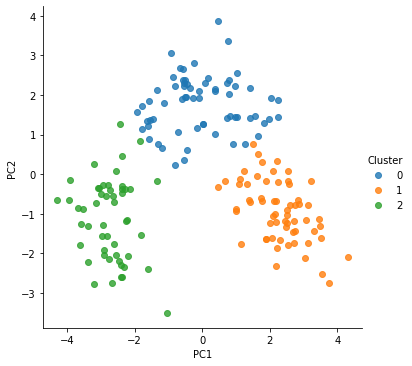

In [13]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
pca_x = pca.transform(X)

pca_df = pd.DataFrame([pca_x[:, 0], pca_x[:, 1]]).T
pca_df.columns = ['PC1', 'PC2']
pca_df = pd.concat([pca_df, df_data['Cluster']], axis=1)
sns.lmplot('PC1', 'PC2', data=pca_df, hue='Cluster', fit_reg=False)